<a href="https://colab.research.google.com/github/jcromeroru/Parcial/blob/main/Parcial_3_Instrumentos_%C3%B3pticos_punto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
nm= 1e-9

N = 2048
M = 2048
w_length = 633*nm #definimos la longitud de onda
dx=dy=3.18*um #definimos el tamaño de pixel con condiciones de mundo

In [ ]:
def ft2(data, delta):
   
    DATA = np.fft.fftshift(
            np.fft.fft2(
                    np.fft.fftshift(data, axes=(-1,-2))
                    ), axes=(-1,-2)
            )*delta**2

    return DATA

In [ ]:
def TFresnel(Uin, wvl, d1, z):
    """
    Propagación de Fresnel usando el método de Transformada de Fresnel
    Devuelve amplitud compleja tras la propagacion

    """
    N = Uin.shape[0]    #Se asume que es cuadrado
    k = 2*np.pi/wvl  #vector de onda optico

    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    #Coordenadas del plano de observación
    d2 = wvl*z/(N*d1)
    x2,y2 = np.meshgrid( np.arange(-N/2.,N/2.) * d2,
                            np.arange(-N/2.,N/2.) * d2 )

    #Evaluación de la integral
    A = 1/(1j*wvl*z)
    B = np.exp( 1j * k/(2*z) * (x2**2 + y2**2))
    C = ft2(Uin *np.exp(1j * k/(2*z) * (x1**2+y1**2)), d1)

    Uout = A*B*C*np.exp(1j*k*z)

    return Uout

In [ ]:
#El indicador me dice si quiero retornar intensidad, amplitud o fase
def graf_complejo(mat,indicador, escala):
  #mat = mat es la compleja que vamos a graficar
  #indicador = I para intensidad, A para amplitud, P para fase
  #escala = 1 para nada, 0 para logaritmica
  if(indicador=="I"):
    mat = np.abs(mat)**2
  elif(indicador=="A"):
    mat = np.abs(mat)
  elif(indicador=="P"):
    mat = np.angle(math)
  
  if(escala==1):
    plt.figure()
    plt.imshow(mat,cmap="gray")
    plt.colorbar()
    plt.show()
  else:
    plt.figure()
    plt.title('Transformada de Fourier de la imagen original')
    plt.imshow(np.log(mat+0.00001),cmap="gray")
    plt.colorbar()
    plt.show()
  return 0

(2048, 2048)


<function matplotlib.pyplot.show>

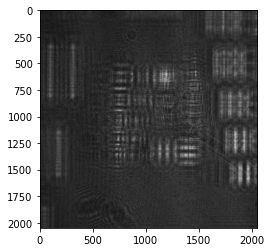

In [ ]:
Holog = cv2.imread("Hologram.tiff",0)
#Holog = Holog/np.max(Holog)
print(np.shape(Holog))
plt.figure()
plt.imshow(Holog,cmap="gray")
plt.show

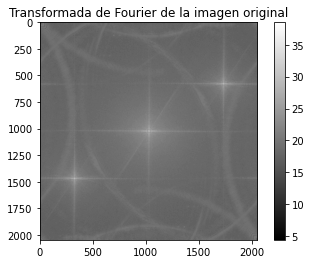

In [ ]:
fft_img_holog = np.fft.fftn(Holog)
fft_img_holog = np.fft.fftshift(fft_img_holog)
graf_complejo(fft_img_holog,"I",0);

In [ ]:
'''Debemos definir dimensiones de mundo para poder escalar de manera física las aberturas y obstáculos'''
M_mask = 2048
N_mask = 2048
#definimos el espacio coordenado
x=np.arange(-int(M_mask/2),int(M_mask/2),1)
y=np.arange(-int(N_mask/2),int(N_mask/2),1)
X,Y =np.meshgrid(x,y)
#damos dimensiones de mundo
X = X*dx
Y = Y*dy

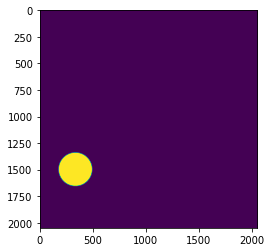

In [ ]:
r_a = 500*um
#Presentamos las máscaras como areglos que permitan dimensiones reales iguales que las máscaras anteriores (en forma)

mask_circ_2 = np.array((X+2.2*mm)**2+(Y-1.5*mm)**2 <= r_a**2, dtype=bool)#rendija circular pasante

mask_dona = mask_circ_2

plt.figure()
plt.imshow(mask_dona)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


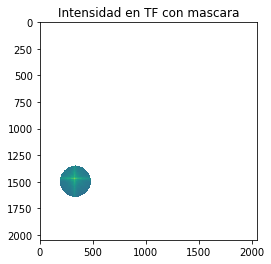

In [ ]:
TRmask = fft_img_holog*mask_dona
#new_imagen=np.fft.ifftn(TRmask)
#graf_complejo(new_imagen,"I",1);
#Grafico de intensidad con mascara hallada abajo
plt.figure()
plt.title("Intensidad en TF con mascara")
plt.imshow(np.log(np.abs(TRmask)))
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


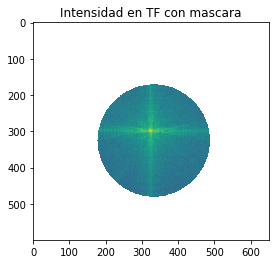

(600, 650)


In [ ]:
Imout = TRmask[1170:1770,0:650]
new_imagen=np.fft.ifft(Imout)
#graf_complejo(new_imagen,"I",1);
plt.figure()
plt.title("Intensidad en TF con mascara")
plt.imshow(np.log(np.abs(Imout)))
plt.show() 
print(np.shape(Imout))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


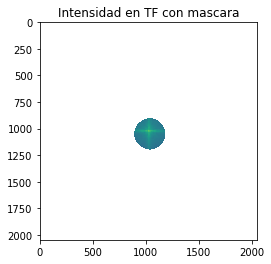

In [ ]:
Matrizllena = np.pad(Imout,[(724,),(699,)],mode='constant')
plt.figure()
plt.title("Intensidad en TF con mascara")
plt.imshow(np.log(np.abs(Matrizllena)))
plt.show()

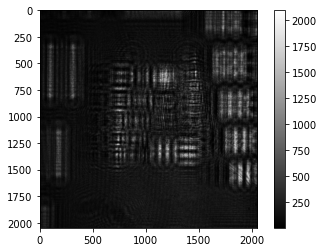

In [ ]:
new_imagen=np.fft.ifftn(Matrizllena)
graf_complejo(new_imagen,"I",1);


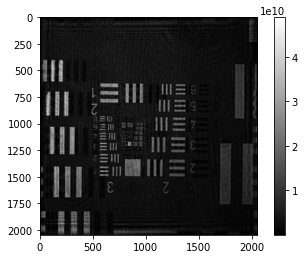

In [ ]:
Prop_hol = TFresnel(Matrizllena, 633*nm, 3.18*um, 14.3*mm)
tprop = np.fft.ifftshift(Prop_hol)
graf_complejo(tprop,"I",1);